In [44]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [45]:
#importing necessary libs

from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.neural_network import MLPClassifier #MLP Classifer
from xgboost import XGBClassifier #XGBoost
from sklearn.naive_bayes import GaussianNB #Import Gaussian Naive Bayes model
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
df = pd.read_csv("train_x.csv")
df_y = pd.read_csv("train_y.csv")
test_df = pd.read_csv('test.csv')

**Merging Label to the DF and Grouping it**

In [3]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

**Handling Missing Values**

In [6]:
# check waht are missing features
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(10)

,Total,%
scheme_name,28166,47.4
scheme_management,3877,6.5
installer,3655,6.2
funder,3635,6.1
public_meeting,3334,5.6
permit,3056,5.1
subvillage,371,0.6
ward,0,0.0
lga,0,0.0
district_code,0,0.0


In [7]:
# check waht are missing features
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(10)

,Total,%
scheme_name,7092,47.8
scheme_management,969,6.5
installer,877,5.9
funder,869,5.9
public_meeting,821,5.5
permit,737,5.0
subvillage,99,0.7
ward,0,0.0
lga,0,0.0
district_code,0,0.0


In [8]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [9]:
#adding value(True) with max count to the missing values since the missing 
#percentage is small
df['public_meeting_feature'] = df['public_meeting'].fillna(df["public_meeting"].describe()[2])
df['public_meeting_feature'] = pd.factorize(df["public_meeting_feature"])[0]

In [10]:
test_df['public_meeting_feature'] = test_df['public_meeting'].fillna(test_df["public_meeting"].describe()[2])
test_df['public_meeting_feature'] = pd.factorize(test_df["public_meeting_feature"])[0]

In [11]:
#adding value(True) with max count to the missing values since the missing 
#percentage is small
df['subvillage_feature'] = df['subvillage'].fillna(df["subvillage"].describe()[2])
df['subvillage_feature'] = pd.factorize(df["subvillage_feature"])[0]

In [12]:
test_df['subvillage_feature'] = test_df['subvillage'].fillna(test_df["subvillage"].describe()[2])
test_df['subvillage_feature'] = pd.factorize(test_df["subvillage_feature"])[0]

**Creating Features**

In [13]:
df['permit_feature'] = df['permit'].fillna(df["permit"].describe()[2])
df['permit_feature'] = pd.factorize(df["permit_feature"])[0]

In [14]:
test_df['permit_feature'] = test_df['permit'].fillna(test_df["permit"].describe()[2])
test_df['permit_feature'] = pd.factorize(test_df["permit_feature"])[0]

In [15]:
# binning lattitude to 6 equal bins
df["latitudeGroup"] =  pd.cut(df.latitude, 8,labels=[0, 1, 2,3,4,5,6,7])
test_df["latitudeGroup"] =  pd.cut(test_df.latitude, 8,labels=[0, 1, 2,3,4,5,6,7])

In [16]:
df["latitudeGroup"] =  pd.factorize(df["latitudeGroup"])[0]
test_df["latitudeGroup"] =  pd.factorize(test_df["latitudeGroup"])[0]

In [17]:
# binning lattitude to 6 equal bins
df["longitudeGroup"] =  pd.cut(df.longitude, 8,labels=[0, 1, 2,3,4,5,6,7])
test_df["longitudeGroup"] =  pd.cut(test_df.longitude, 8,labels=[0, 1, 2,3,4,5,6,7])

In [18]:
df["longitudeGroup"] =  pd.factorize(df["longitudeGroup"])[0]
test_df["longitudeGroup"] =  pd.factorize(test_df["longitudeGroup"])[0]

In [19]:
# grouping the feature
df['extraction_type_feature'] = pd.factorize(df["extraction_type"])[0]
test_df['extraction_type_feature'] = pd.factorize(test_df["extraction_type"])[0]

In [20]:
# grouping the feature
df['extraction_type_group_feature'] = pd.factorize(df["extraction_type_group"])[0]
test_df['extraction_type_group_feature'] = pd.factorize(test_df["extraction_type_group"])[0]

In [21]:
# grouping the feature
df['extraction_type_class_feature'] = pd.factorize(df["extraction_type_class"])[0]
test_df['extraction_type_class_feature'] = pd.factorize(test_df["extraction_type_class"])[0]

In [22]:
# grouping the feature
df['lga_feature'] = pd.factorize(df["lga"])[0]
test_df['lga_feature'] = pd.factorize(test_df["lga"])[0]

In [23]:
# grouping the feature
df['ward_feature'] = pd.factorize(df["ward"])[0]
test_df['ward_feature'] = pd.factorize(test_df["ward"])[0]

In [24]:
# grouping the feature
df['region_feature'] = pd.factorize(df["region"])[0]
test_df['region_feature'] = pd.factorize(test_df["region"])[0]

In [25]:
# grouping the feature
df['water_quality_feature'] = pd.factorize(df["water_quality"])[0]
test_df['water_quality_feature'] = pd.factorize(test_df["water_quality"])[0]

In [26]:
# grouping the feature
df['quality_group_feature'] = pd.factorize(df["quality_group"])[0]
test_df['quality_group_feature'] = pd.factorize(test_df["quality_group"])[0]

In [27]:
# grouping the feature
df['quantity_feature'] = pd.factorize(df["quantity"])[0]
test_df['quantity_feature'] = pd.factorize(test_df["quantity"])[0]

In [28]:
# grouping the feature
df['quantity_group_feature'] = pd.factorize(df["quantity_group"])[0]
test_df['quantity_group_feature'] = pd.factorize(test_df["quantity_group"])[0]

In [29]:
# grouping the feature
df['source_type_feature'] = pd.factorize(df["source_type"])[0]
test_df['source_type_feature'] = pd.factorize(test_df["source_type"])[0]

In [30]:
# grouping the feature
df['source_feature'] = pd.factorize(df["source"])[0]
test_df['source_feature'] = pd.factorize(test_df["source"])[0]

In [31]:
# grouping the feature
df['source_class_feature'] = pd.factorize(df["source_class"])[0]
test_df['source_class_feature'] = pd.factorize(test_df["source_class"])[0]

In [32]:
# grouping the feature
df['waterpoint_type_feature'] = pd.factorize(df["waterpoint_type"])[0]
test_df['waterpoint_type_feature'] = pd.factorize(test_df["waterpoint_type"])[0]

In [33]:
# grouping the feature
df['waterpoint_type_group_feature'] = pd.factorize(df["waterpoint_type_group"])[0]
test_df['waterpoint_type_group_feature'] = pd.factorize(test_df["waterpoint_type_group"])[0]

In [34]:
# grouping the feature
df['construction_year_feature'] = pd.factorize(df["construction_year"])[0]
test_df['construction_year_feature'] = pd.factorize(test_df["construction_year"])[0]

In [35]:
#breaking down date_recorded feature to year and date

df['date_recorded'] = pd.DatetimeIndex(df['date_recorded'])
test_df['date_recorded'] = pd.DatetimeIndex(test_df['date_recorded'])

df['date_recorded_year'] = pd.DatetimeIndex(df['date_recorded']).year
df['date_recorded_month'] = pd.DatetimeIndex(df['date_recorded']).month
df['date_recorded_date'] = pd.DatetimeIndex(df['date_recorded']).day

test_df['date_recorded_year'] = pd.DatetimeIndex(test_df['date_recorded']).year
test_df['date_recorded_month'] = pd.DatetimeIndex(test_df['date_recorded']).month
test_df['date_recorded_date'] = pd.DatetimeIndex(test_df['date_recorded']).day

**Creating the Label**

In [36]:
df['status_group'] = df_y['status_group']
df['status_group_y'],staus_group_labels = pd.factorize(df["status_group"])

**Correlation Matrix**

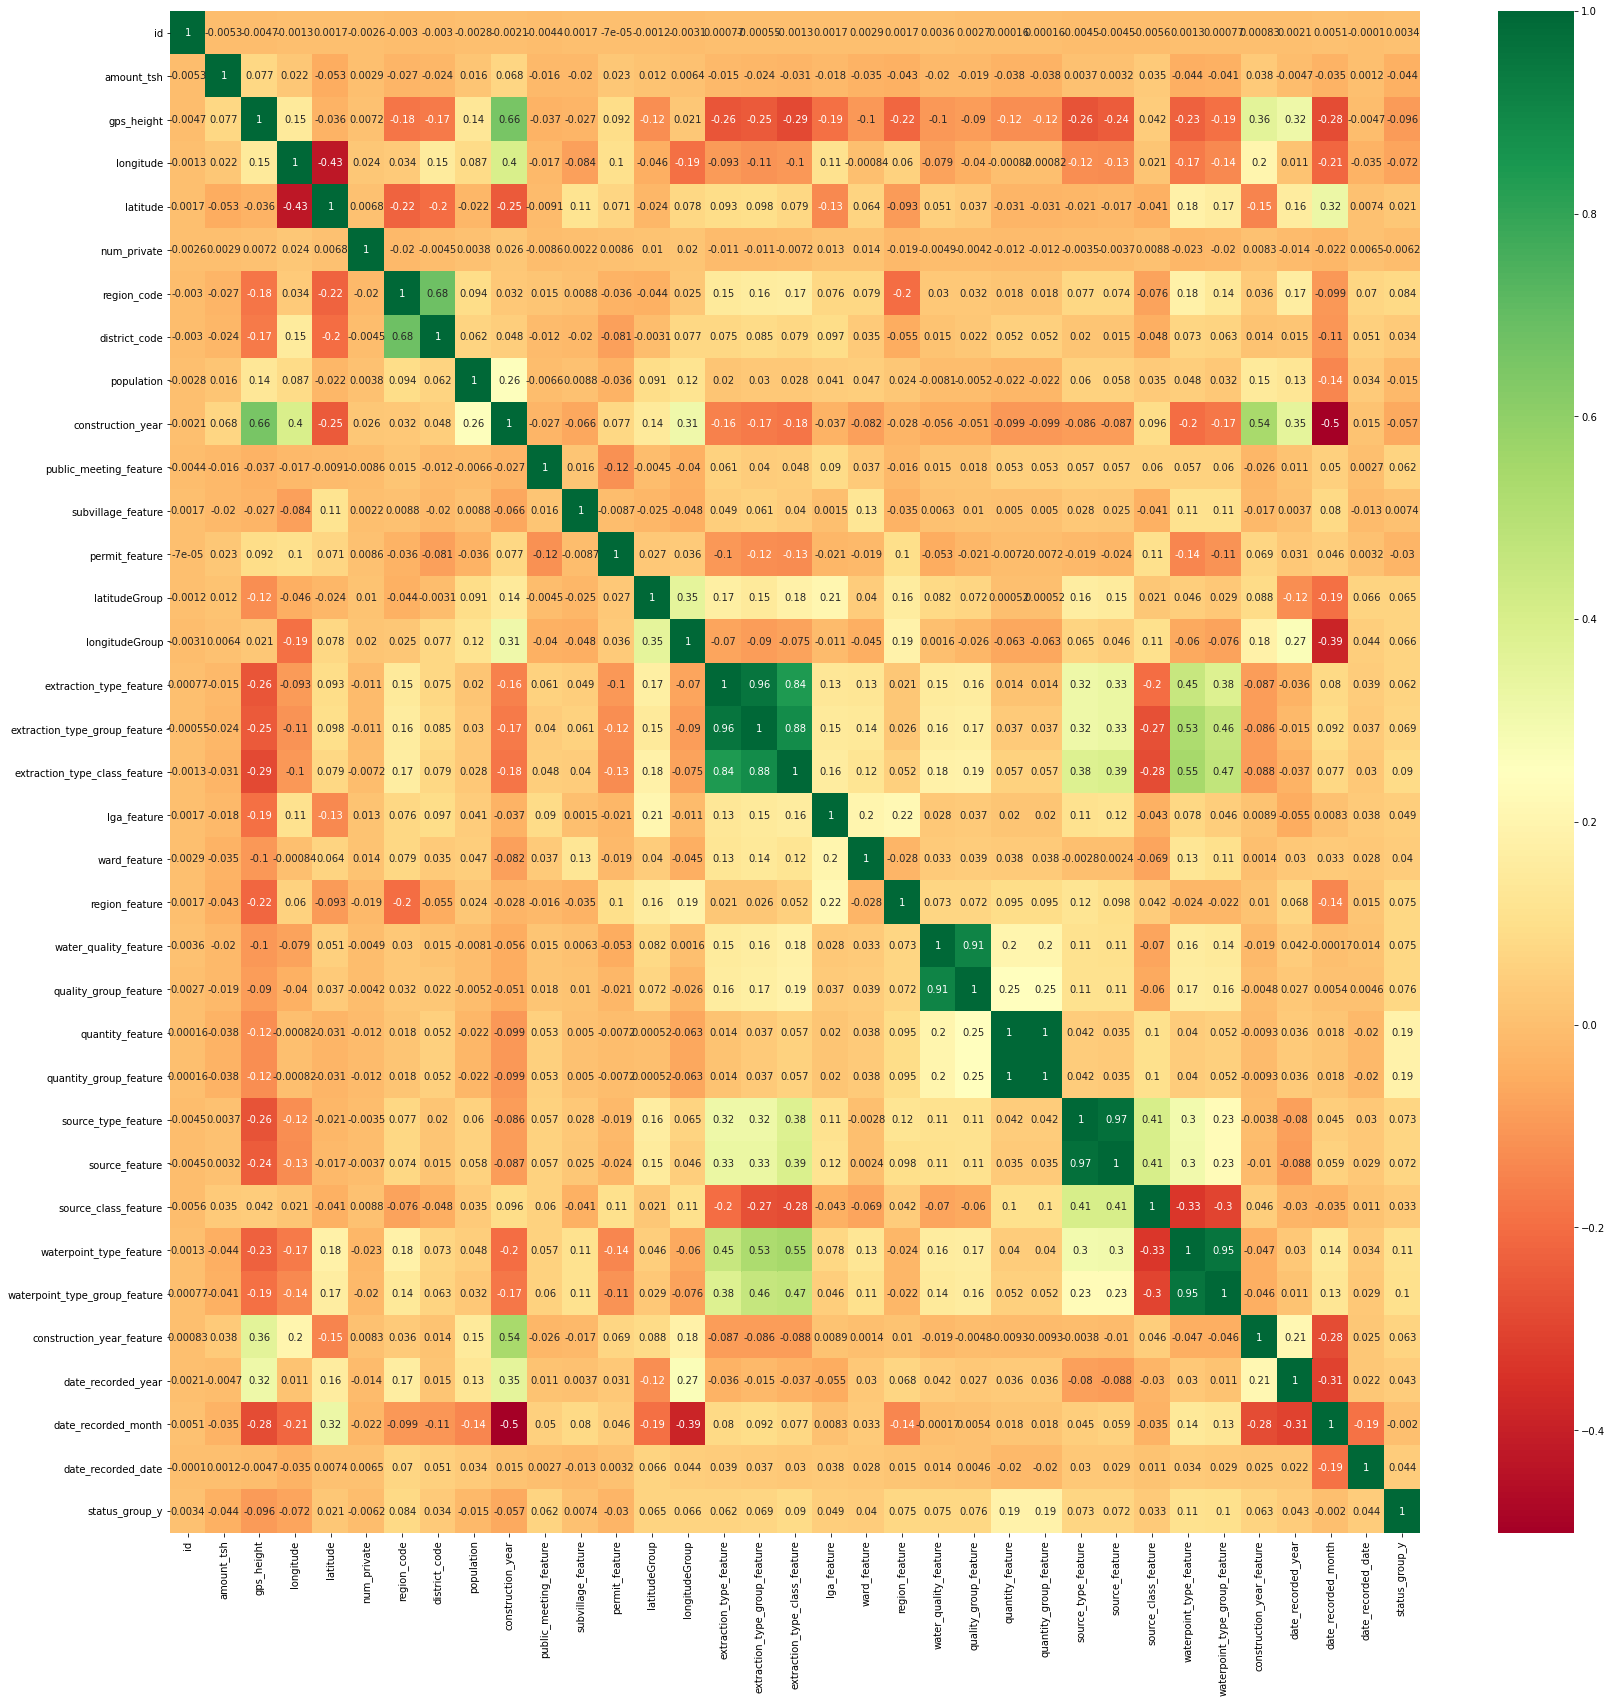

In [37]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(28,28))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

**Training Models for the Classification**

In [56]:
features = ['id','longitudeGroup','latitudeGroup','region_code','district_code','public_meeting_feature','subvillage_feature','extraction_type_feature','extraction_type_group_feature','extraction_type_class_feature','lga_feature','ward_feature','region_feature','water_quality_feature','quality_group_feature','quantity_feature','quantity_group_feature','source_type_feature','source_feature','source_class_feature','waterpoint_type_feature','waterpoint_type_group_feature','date_recorded_year','date_recorded_date']

In [39]:
# features = ['region_code','public_meeting_feature','latitudeGroup','extraction_type_feature','extraction_type_group_feature','extraction_type_class_feature','lga_feature','region_feature','water_quality_feature','quality_group_feature','quantity_feature','quantity_group_feature','source_type_feature','source_feature','waterpoint_type_feature','waterpoint_type_group_feature','date_recorded_date']

In [40]:
#features = ['id','longitudeGroup','latitudeGroup','region_code','district_code','public_meeting_feature','subvillage_feature','extraction_type_feature','extraction_type_group_feature','extraction_type_class_feature','lga_feature','ward_feature','region_feature','water_quality_feature','quality_group_feature','quantity_feature','source_type_feature','source_feature','source_class_feature','waterpoint_type_feature','construction_year_feature','date_recorded_year','date_recorded_date']

In [41]:
#features = ['extraction_type_class_feature','quantity_feature']

In [57]:
len(features)

24

In [58]:
features_train = df[features]
label = df['status_group_y']

features_test = test_df[features]

In [62]:
# XG Boost Classifer
cat_model = CatBoostClassifier()
cat_model.fit(features_train, label)

Learning rate set to 0.097451
0:	learn: 1.0349296	total: 46.4ms	remaining: 46.4s
1:	learn: 0.9831488	total: 87ms	remaining: 43.4s
2:	learn: 0.9407401	total: 130ms	remaining: 43.1s
3:	learn: 0.9062015	total: 172ms	remaining: 42.9s
4:	learn: 0.8778716	total: 215ms	remaining: 42.7s
5:	learn: 0.8540966	total: 256ms	remaining: 42.4s
6:	learn: 0.8336858	total: 298ms	remaining: 42.3s
7:	learn: 0.8160996	total: 341ms	remaining: 42.3s
8:	learn: 0.8014986	total: 378ms	remaining: 41.6s
9:	learn: 0.7878377	total: 420ms	remaining: 41.6s
10:	learn: 0.7773291	total: 458ms	remaining: 41.2s
11:	learn: 0.7680318	total: 496ms	remaining: 40.8s
12:	learn: 0.7580546	total: 542ms	remaining: 41.1s
13:	learn: 0.7497593	total: 587ms	remaining: 41.3s
14:	learn: 0.7420171	total: 636ms	remaining: 41.8s
15:	learn: 0.7349088	total: 680ms	remaining: 41.8s
16:	learn: 0.7281851	total: 724ms	remaining: 41.9s
17:	learn: 0.7232232	total: 772ms	remaining: 42.1s
18:	learn: 0.7186835	total: 813ms	remaining: 42s
19:	learn: 0.

In [ ]:
# RandomForest Classifer
clf = RandomForestClassifier()
clf.fit(features_train,label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
# XG Boost Classifer
model = XGBClassifier()
model.fit(features_train, label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model.feature_importances_

array([0.21136533, 0.56538314, 0.22325163], dtype=float32)

In [ ]:
model.feature_importances_

array([0.3508107 , 0.64918923], dtype=float32)

In [ ]:
# GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(features_train, label)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# MLPClassifier
mlp_clf = MLPClassifier()
mlp_clf.fit(features_train, label)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=201) #current best 101
knn_clf.fit(features_train, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=101, p=2,
                     weights='uniform')

In [63]:
#using CatBoost
test_df["status_group_y"] = cat_model.predict(features_test)
test_df['status_group'] = staus_group_labels[test_df['status_group_y']]

In [ ]:
#using Random Forest
test_df["status_group_y"] = clf.predict(features_test)
test_df['status_group'] = staus_group_labels[test_df['status_group_y']]

In [60]:
#using XGBoost
test_df["status_group_y"] = model.predict(features_test)
test_df['status_group'] = staus_group_labels[test_df['status_group_y']]

In [ ]:
#using MLP Classifer
test_df["status_group_y"] = mlp_clf.predict(features_test)
test_df['status_group'] = staus_group_labels[test_df['status_group_y']]

In [ ]:
#using GNB Classifer
test_df["status_group_y"] = gnb_clf.predict(features_test)
test_df['status_group'] = staus_group_labels[test_df['status_group_y']]

In [ ]:
#using KNNN Classifer
test_df["status_group_y"] = knn_clf.predict(features_test)
test_df['status_group'] = staus_group_labels[test_df['status_group_y']]

In [64]:
test_df.to_csv("as.csv", columns=["id","status_group"], index=False)